In [1]:
# https://www.tensorflow.org/tutorials/load_data/images

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [3]:
batch_size = 32
img_height = 208
img_width = 176

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "AlzheimersDataset",
    validation_split=0.2,
    color_mode="grayscale",
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6400 files belonging to 2 classes.
Using 5120 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "AlzheimersDataset",
    validation_split=0.2,
    color_mode="grayscale",
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6400 files belonging to 2 classes.
Using 1280 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Negative', 'Positive']


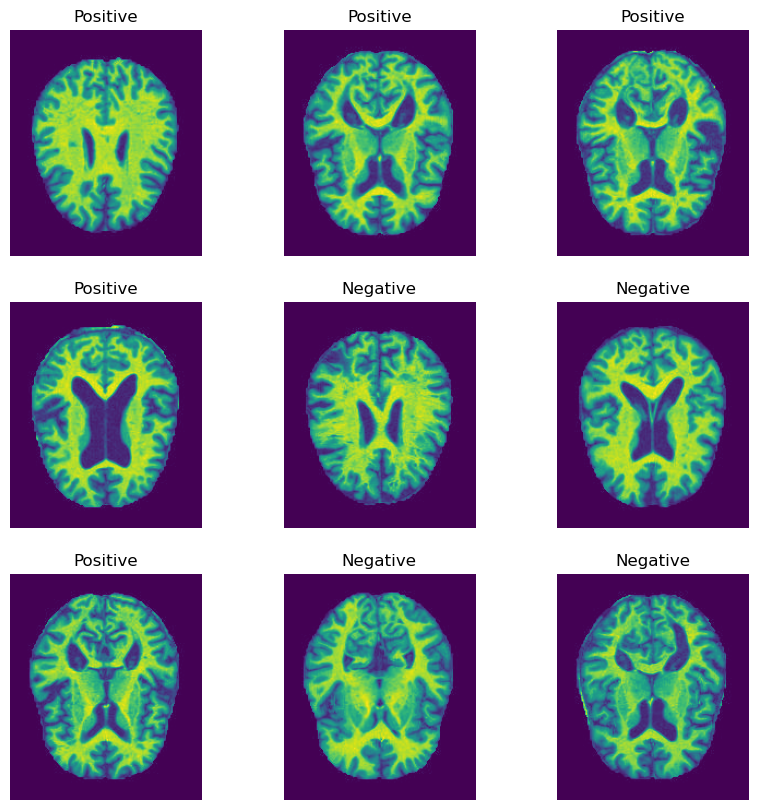

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [10]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5)

Epoch 1/5
160/160 [==============================] - 86s 532ms/step - loss: 0.6367 - accuracy: 0.6359 - val_loss: 0.5487 - val_accuracy: 0.7336
Epoch 2/5
160/160 [==============================] - 92s 578ms/step - loss: 0.4830 - accuracy: 0.7670 - val_loss: 0.3938 - val_accuracy: 0.8141
Epoch 3/5
160/160 [==============================] - 96s 598ms/step - loss: 0.3216 - accuracy: 0.8600 - val_loss: 0.3097 - val_accuracy: 0.8586
Epoch 4/5
160/160 [==============================] - 88s 553ms/step - loss: 0.2046 - accuracy: 0.9186 - val_loss: 0.1829 - val_accuracy: 0.9273
Epoch 5/5
160/160 [==============================] - 87s 546ms/step - loss: 0.1317 - accuracy: 0.9543 - val_loss: 0.1878 - val_accuracy: 0.9328


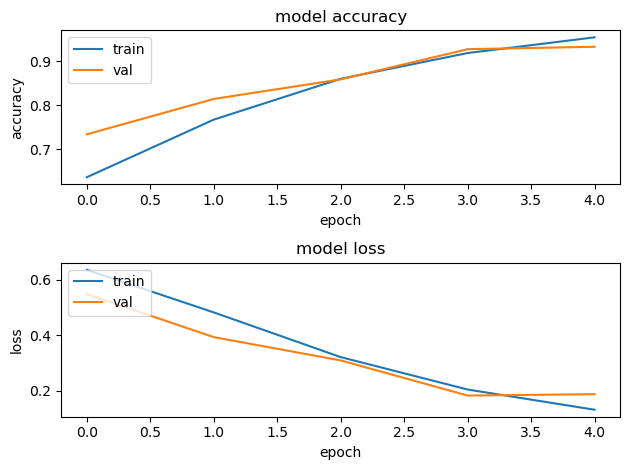

In [12]:
plt.figure(1)

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()